# Huy Hoang Vuong

##  Statistics & Public Health 2: Data Analysis

In [1]:
#import some library first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

Let's pull out new Dataset.

In [2]:
public_health_df= pd.read_csv('Data/mosquito_data_part_2.csv')
public_health_df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


Shape of Dataset

In [3]:
public_health_df.shape

(18495, 12)

In [4]:
print(f'There are {public_health_df.shape[0]} rows and {public_health_df.shape[1]} columns in the dataset.')

There are 18495 rows and 12 columns in the dataset.


Checking the null value

In [5]:
public_health_df.isna().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

    Get data type of all column in dataset

In [6]:
public_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


Checking is there any duplicates rows or column in the dataset

In [7]:
print(f'Dulpicate columns: {public_health_df.T.duplicated().any()}')
print(f'Dulpicate rows: {public_health_df.duplicated().any()}')

Dulpicate columns: False
Dulpicate rows: True


In [8]:
public_health_df[public_health_df.duplicated(keep=False)]

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
187,2019,35,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-29 00:08:00,3,positive,CULEX RESTUANS,41.977738,-87.880969,8
273,2019,34,100XX W OHARE AIRPORT,T901,GRAVID,2019-08-22 00:08:00,16,positive,CULEX RESTUANS,41.977738,-87.880969,8
310,2019,33,100XX W OHARE,T903,GRAVID,2019-08-15 00:08:00,3,positive,CULEX RESTUANS,41.977738,-87.880969,8
341,2019,33,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-15 00:08:00,15,positive,CULEX RESTUANS,41.977738,-87.880969,8
398,2019,32,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-08 00:08:00,8,positive,CULEX RESTUANS,41.977738,-87.880969,8
...,...,...,...,...,...,...,...,...,...,...,...,...
18476,2013,29,100XX W OHARE AIRPORT,T912,GRAVID,2013-07-19 00:07:00,46,positive,CULEX RESTUANS,41.977738,-87.880969,7
18477,2013,35,100XX W OHARE AIRPORT,T906,GRAVID,2013-08-29 00:08:00,50,positive,CULEX PIPIENS,41.977738,-87.880969,8
18486,2016,29,100XX W OHARE AIRPORT,T911,GRAVID,2016-07-21 00:07:00,47,positive,CULEX RESTUANS,41.977738,-87.880969,7
18488,2017,30,100XX W OHARE AIRPORT,T900,GRAVID,2017-07-27 00:07:00,17,positive,CULEX RESTUANS,41.977738,-87.880969,7


It said that the dataset has some duplicate data inside. The reason can be the number of mosquito was caught in 1 trap is more than 100 and it had to divide to other row because 1 row of record would only have maximum of 50 mosquito number in that. 

Print out all stats of the data

In [9]:
public_health_df.describe()

,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


### Part 1: Basic Analyst

**Question 1:** Convert `WNV Present` column to Binary column and create the dymmy variables from the `Trap type`

Convert the value from `WNV Present` column to binary:
- negative -> o
- positive -> 1

In [10]:
public_health_df['WNV Present']= np.where(public_health_df['WNV Present']=='positive',1,0)

Check it

In [11]:
public_health_df

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,1,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,1,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,1,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,1,CULEX RESTUANS,41.919197,-87.664758,8


In [12]:
#count the trap type
public_health_df['Trap type'].value_counts()

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

   Create dummy variable from **Trap type** column

In [13]:
dummies=pd.get_dummies(public_health_df['Trap type'])

In [14]:
dummies

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


Drop the 'Trap Type' column and repalce by the dummies column

In [15]:
public_health_df.drop(columns='Trap type', axis=1, inplace=True)

After we drop the column `Trap type` we add the all dummies columns in to the Dataframe

In [16]:
public_health_df = public_health_df.join(dummies)

Take a look at dataset again to make sure `Trap type` was dropped and the dummies columns is added

In [17]:
public_health_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


**Question 2: The average number of mosquitoes for each month**

In [18]:
avg_mon=public_health_df.groupby('Month').mean()['Mosquito number']
avg_mon

/var/folders/lv/tbn_js5s77ndnb22_v4_z6q80000gn/T/ipykernel_12544/3638635493.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_mon=public_health_df.groupby('Month').mean()['Mosquito number']


Month
5      2.761905
6     10.264442
7     11.551879
8     12.111321
9      8.394973
10     5.377778
Name: Mosquito number, dtype: float64

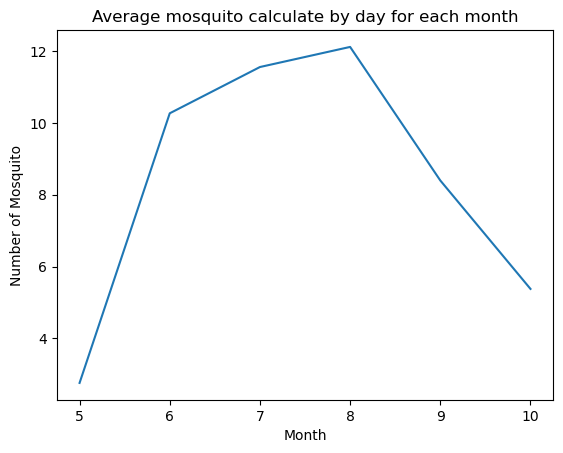

In [19]:
plt.figure()
plt.plot(avg_mon)
plt.title('Average mosquito calculate by day for each month')
plt.xlabel('Month')
plt.ylabel('Number of Mosquito')
plt.show()

As we can see above the time for trapping mosquito start from May to Octorber. The trend of it is the number of mosquito is increase from May and reach a peak in August. After that, it going down and stop in October.

## Part 2: Statistical Analysis

**Question 1: The occurrence of WNV by mosquito species**

How many mosquito was catch in total?

In [20]:
public_health_df.groupby('Species')['WNV Present'].count()

Species
CULEX PIPIENS        5486
CULEX RESTUANS      11866
CULEX SALINARIUS      226
CULEX TERRITANS       917
Name: WNV Present, dtype: int64

How many mosquito was caught  has the West Nile virus by each type of trap?

In [21]:
public_health_df.groupby('Species')['WNV Present'].sum()

Species
CULEX PIPIENS       1412
CULEX RESTUANS      2557
CULEX SALINARIUS      11
CULEX TERRITANS       14
Name: WNV Present, dtype: int64

Let's see statistic about the WNV present by mosquito species

In [22]:
public_health_df.groupby('Species')['WNV Present'].agg(['mean', 'std', 'var'])

,mean,std,var
Species,,,
CULEX PIPIENS,0.257382,0.437232,0.191172
CULEX RESTUANS,0.215490,0.411179,0.169068
CULEX SALINARIUS,0.048673,0.215660,0.046509
CULEX TERRITANS,0.015267,0.122680,0.015051


Look at above we can see that, for using the `Culex Pipiens` trap, 23.73 percent of the amount mosquito was caught has WNV. In the second position is `Culex Restuans` trap with 21.55 percent is mosquito has WNV. The trap `Culex Salinarius` and `Culex territans` have very low portion of the number mosquito was caught with the number is : 4.87% for `Saliarius` and 1.53% for `Terrians`

**Question 2**

Calculate correlation of each numeric column in the dataset

In [23]:
public_health_df.corr().style.background_gradient()

/var/folders/lv/tbn_js5s77ndnb22_v4_z6q80000gn/T/ipykernel_12544/3680964541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  public_health_df.corr().style.background_gradient()


,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,-0.011656,0.128327
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,-0.013587,0.043002
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,-0.005392,0.108575
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,-0.003859,0.047073
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,0.001292,-0.017184
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,-0.004017,0.055548
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,-0.011988,0.035333
CDC,-0.261514,0.028723,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.001280,-0.018611
GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.035669,-0.518582
OVI,-0.011656,-0.013587,-0.005392,-0.003859,0.001292,-0.004017,-0.011988,-0.001280,-0.035669,1.000000,-0.000786


A correlation matrix is a table showing the correlation coefficients between set of vatiable. From this table, we can see that the columns have positively correlation with `Mosquito number` is: `WNV Present`, `Lat`, `Year`, `CDC` and `SENTINEL`. 

The columns have negative correlation with `Mosquito number` is : `Week`, `Lon`, `Month`, `GRAVID` and `OVI`

As we can see from the table, the strongest relationship with `Mosquito number` is `WNV Present` with the correlation is : 0.408. That's mean there are no strong relation with `Mosqito number` for all of the column in table

## Part 3: Advance Statistic Analysis

Let's do some Data Preprocessing before start the model

Look at the data 1 more time

In [24]:
public_health_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


In [25]:
public_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Date             18495 non-null  object 
 5   Mosquito number  18495 non-null  int64  
 6   WNV Present      18495 non-null  int64  
 7   Species          18495 non-null  object 
 8   Lat              18495 non-null  float64
 9   Lon              18495 non-null  float64
 10  Month            18495 non-null  int64  
 11  CDC              18495 non-null  uint8  
 12  GRAVID           18495 non-null  uint8  
 13  OVI              18495 non-null  uint8  
 14  SENTINEL         18495 non-null  uint8  
dtypes: float64(2), int64(5), object(4), uint8(4)
memory usage: 1.6+ MB


In [26]:
#check Trap
public_health_df['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T128A      1
T135B      1
T241       1
T167       1
T040       1
Name: Trap, Length: 190, dtype: int64

In [27]:
# check species
public_health_df['Species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

There are 4 kind of mosqito, we will create dummies varialbe from `Species` and drop the `Species` column

In [29]:
species_dummies= pd.get_dummies(public_health_df['Species'])

In [30]:
public_health_df.drop(columns='Species', axis=1, inplace=True)

In [31]:
public_health_df=public_health_df.join(species_dummies)

In [32]:
public_health_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


As we can say that, if the trap type is 0 for `CDC`, `GRAVID`,`SENITNEL` means the trap type iwll be the OVI. We are going to drop one columns in the trap type dummy and same thinh with the mosquito type one column in mosquito type dummies to avoid the extra information for the data. 

In [33]:
#Let drop the OVI in the trap type since it was use only 1
public_health_df.drop(columns='OVI', axis=1, inplace=True)

In [34]:
#drop the CULEX SALINARIUS  for the mosquito type
public_health_df.drop(columns='CULEX SALINARIUS', axis=1, inplace=True)

In [35]:
public_health_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,0,1,0,0,1,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,0,1,0,0,1,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,0,1,0,0,1,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,0,1,0,0,1,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,0,1,0,0,1,0


In [36]:
public_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Date             18495 non-null  object 
 5   Mosquito number  18495 non-null  int64  
 6   WNV Present      18495 non-null  int64  
 7   Lat              18495 non-null  float64
 8   Lon              18495 non-null  float64
 9   Month            18495 non-null  int64  
 10  CDC              18495 non-null  uint8  
 11  GRAVID           18495 non-null  uint8  
 12  SENTINEL         18495 non-null  uint8  
 13  CULEX PIPIENS    18495 non-null  uint8  
 14  CULEX RESTUANS   18495 non-null  uint8  
 15  CULEX TERRITANS  18495 non-null  uint8  
dtypes: float64(2), int64(5), object(3), uint8(6)
memory usage:

**Question1:** Use Linear Regression to determine how independent feature affect the number of mosquito caught

### 1. Verifying assumptions associated with linear regression models

#### 1.1. Linearity

Separate the data into dependent and independent variables.

In [37]:
# X is the data containing the independent variables.
# y is the target.  The dependent variable.
X=public_health_df.drop(columns=['Address Block', 'Trap', 'Date', 'WNV Present', 'Mosquito number'])
y= public_health_df['Mosquito number']

In [38]:
# Checking the shape of X and y variables

print(f'Original data set had {public_health_df.shape[0]} rows and {public_health_df.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original data set had 18495 rows and 16 columns.
X has 18495 rows and 11 columns.
y has 18495 rows and 1 column.


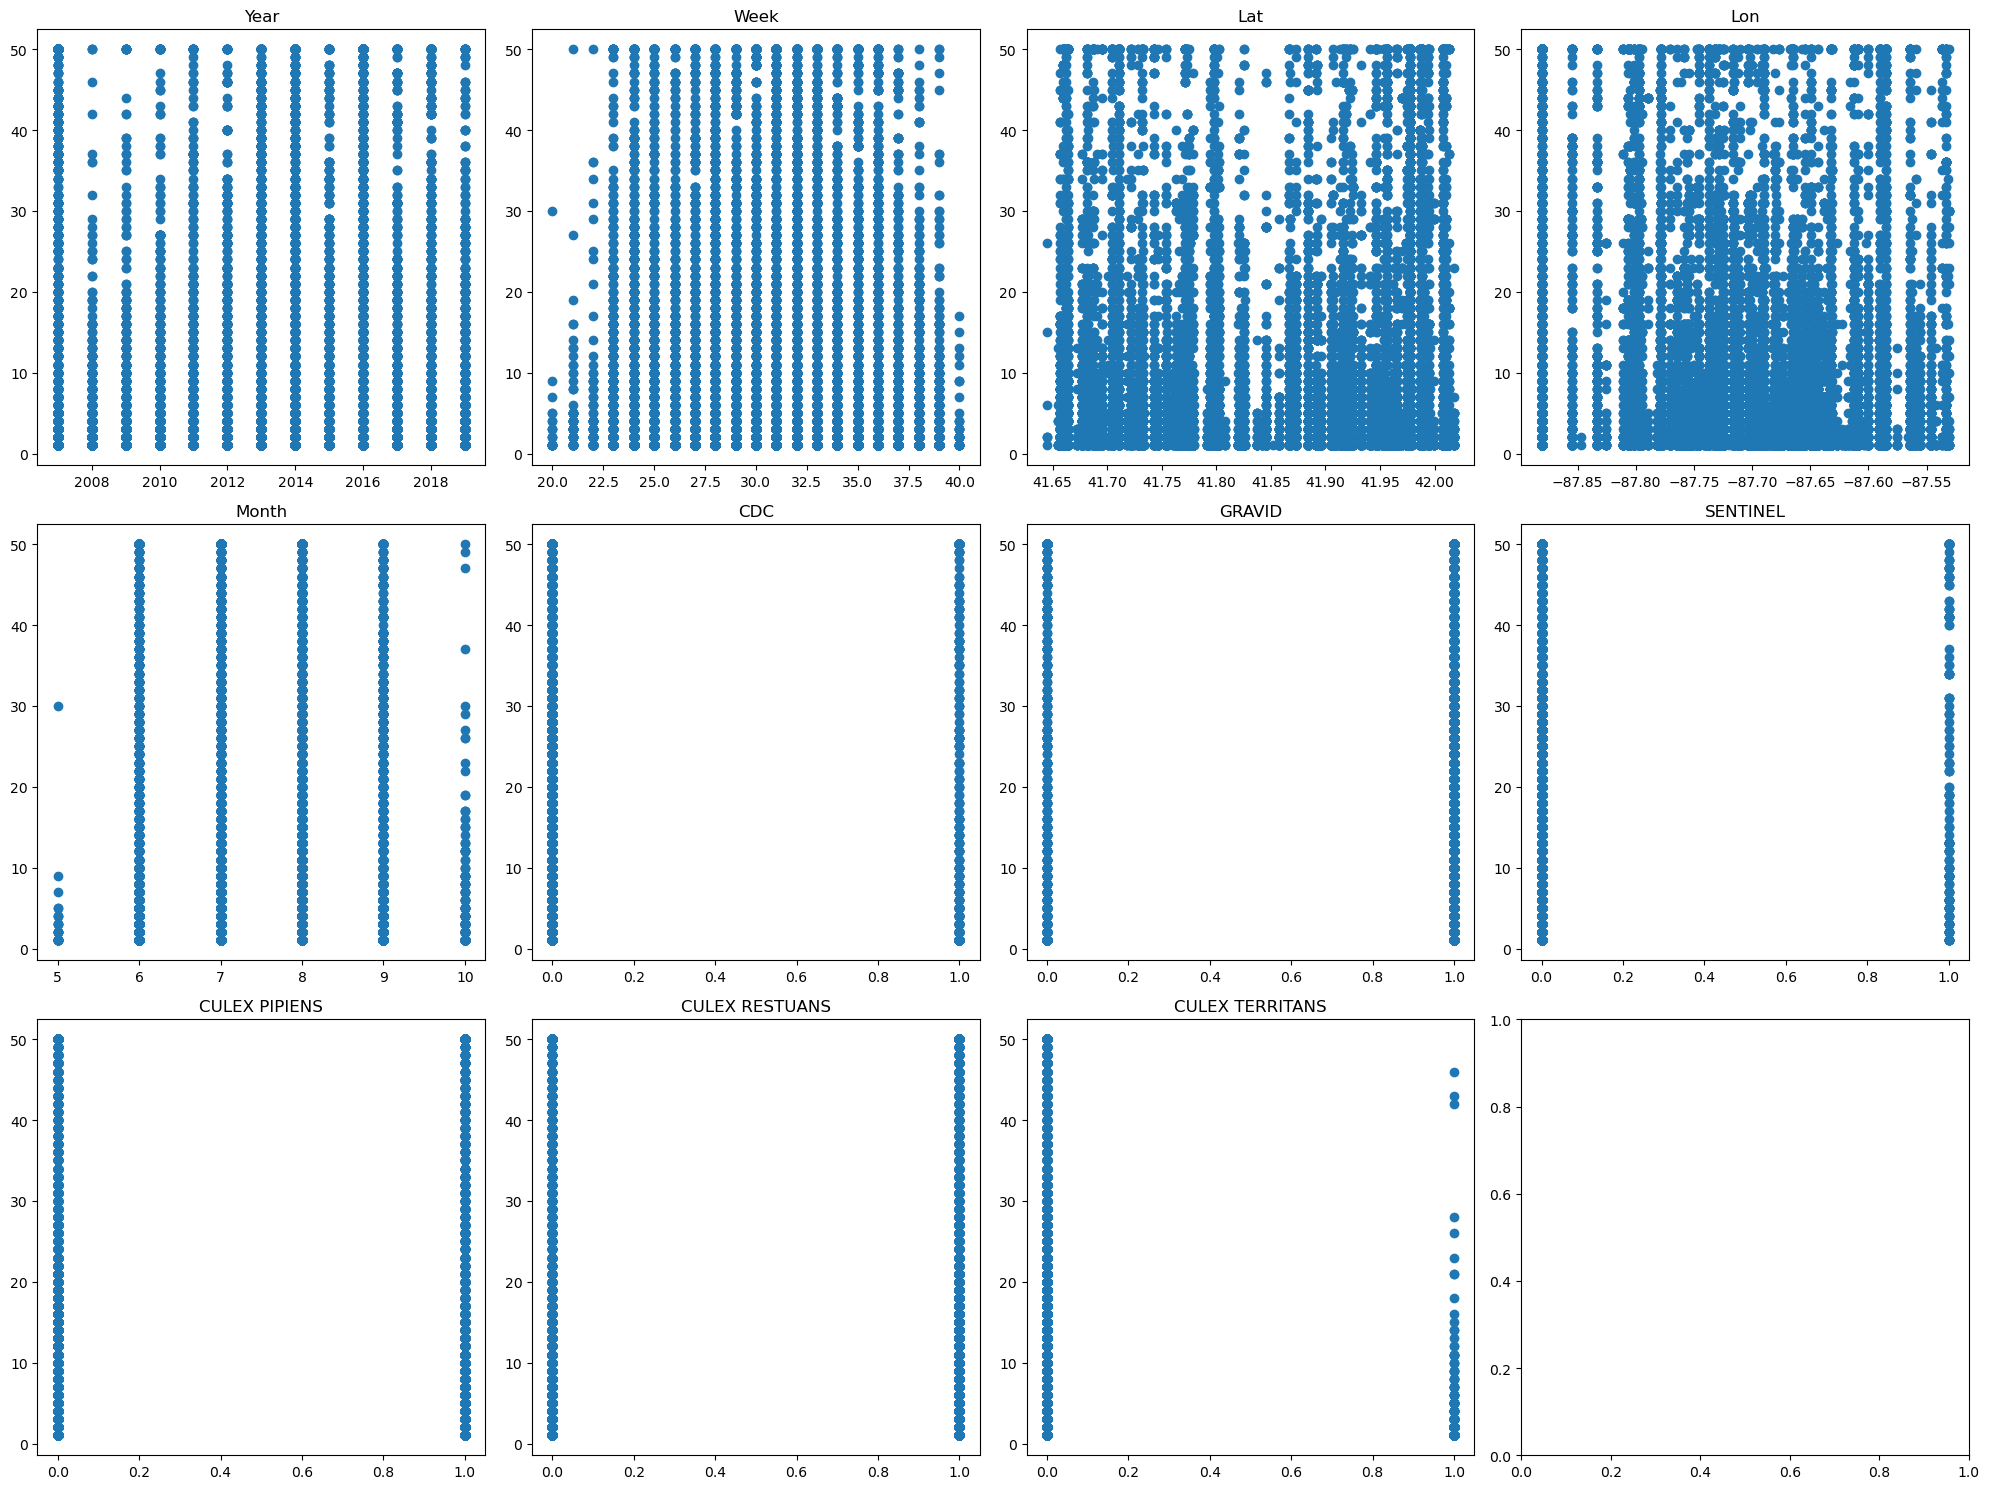

In [39]:
#Plot the relationship between X and y. 

plt.subplots(3,4, figsize=(20, 15))

count =1
for col in X.columns:
    plt.subplot(3,4,count)
    plt.scatter(X[col], y)
    plt.title(col)
    count+=1
plt.tight_layout()
plt.show()

As we can see above, there is non of the independent variable showing any trend in the plots with the target variable. It mean there are no linear correlation between the independence variable and the dependece variable.


#### Independence or No Multicollienearity

In [40]:
#define correlation matrix and mask
corr_df= X.corr()
mask= np.triu(corr_df)


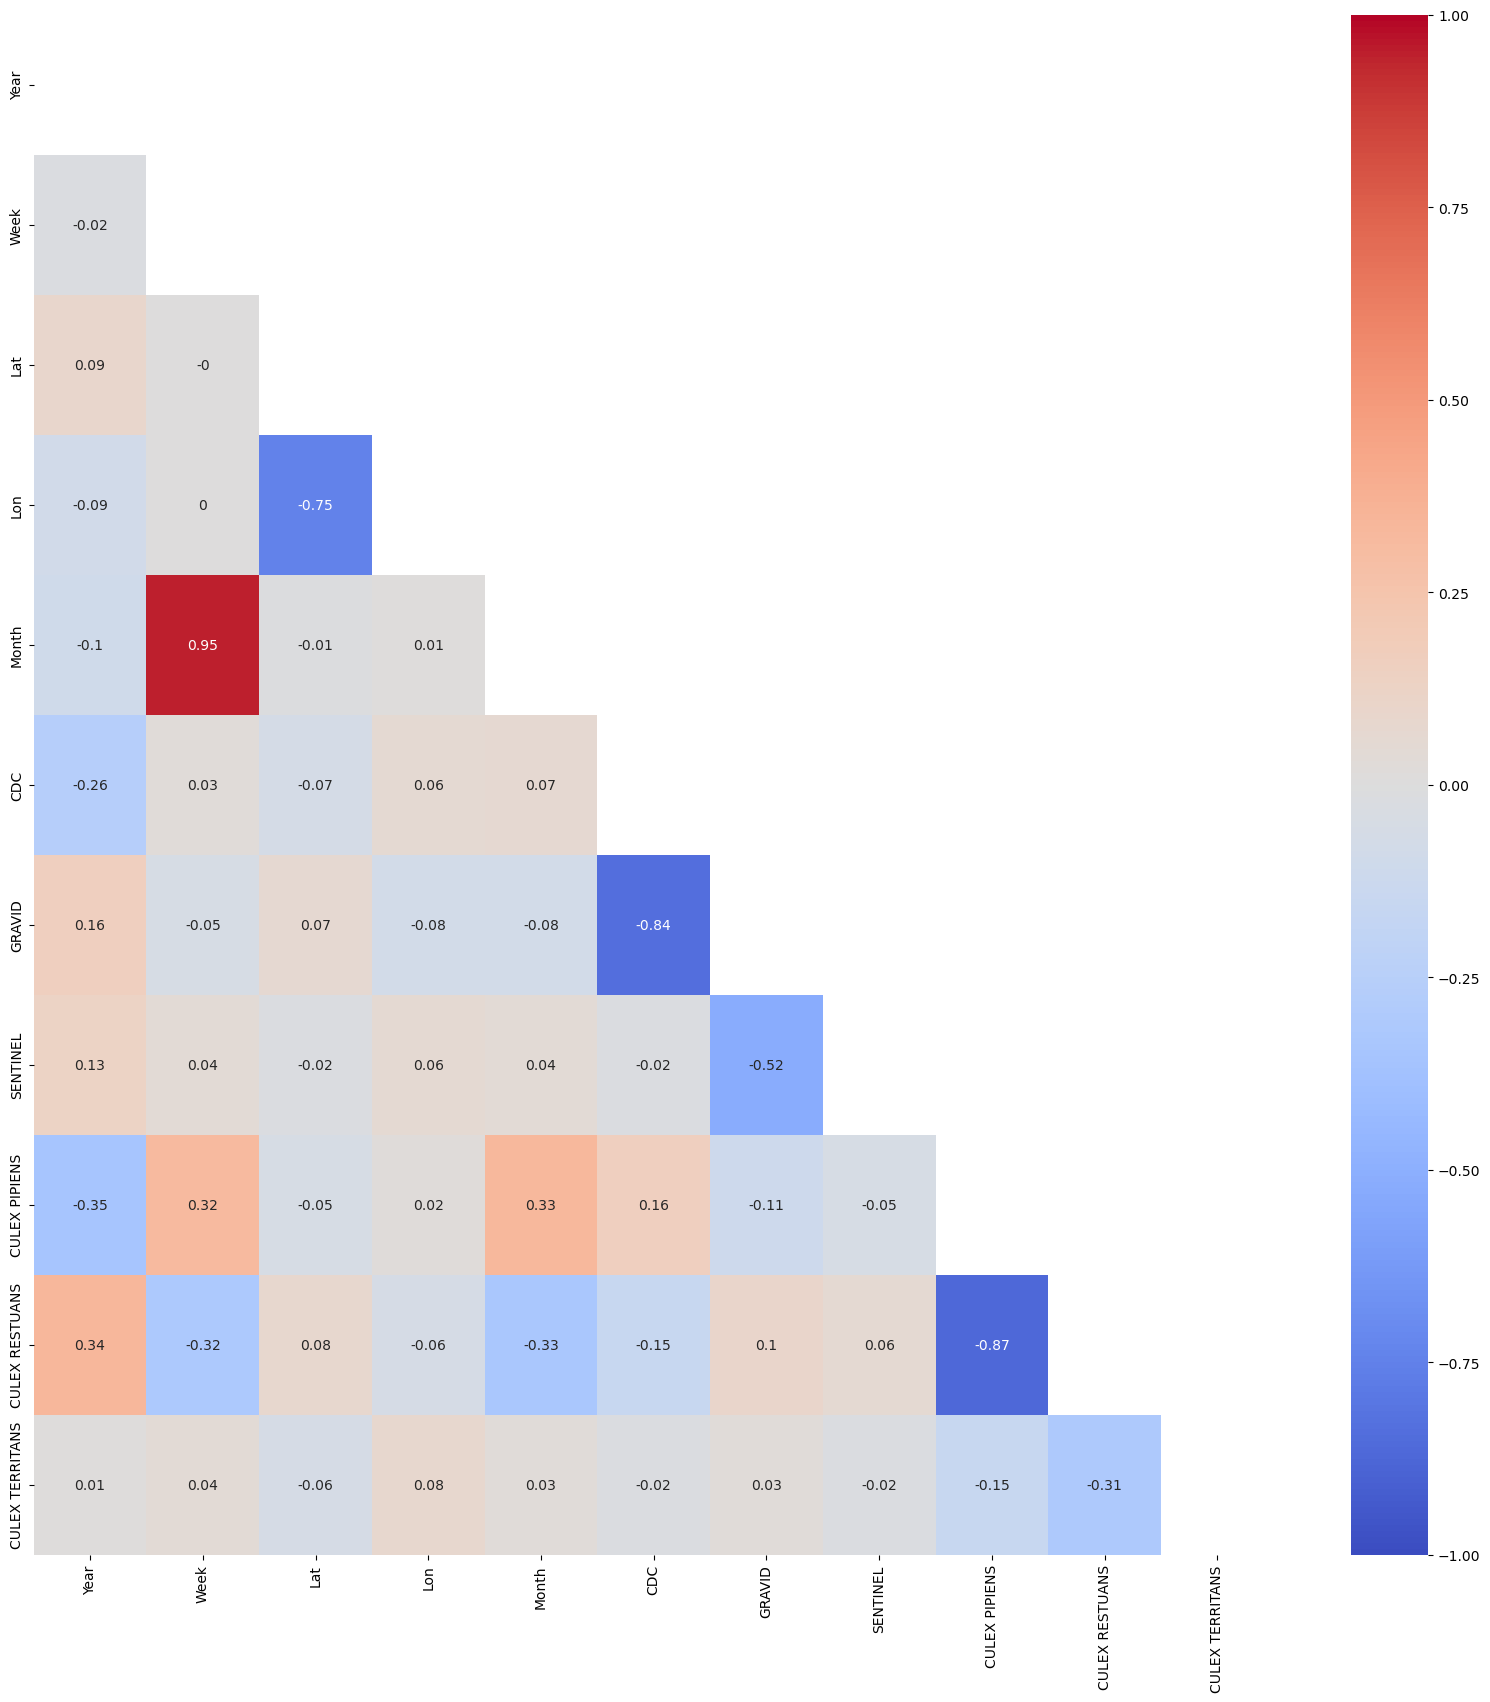

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

The correlation between `Month` and `Week` is very high: 0.95 and these two column can be considered as the same data column. In this case we are going to delete the `Month` column because when we know the week, we are also know which month is this.

In [42]:
#drop Month column
X.drop(columns='Month', axis=1, inplace=True)

In [43]:
#re-define correlation matrix and mask
corr_df= X.corr()
mask= np.triu(corr_df)

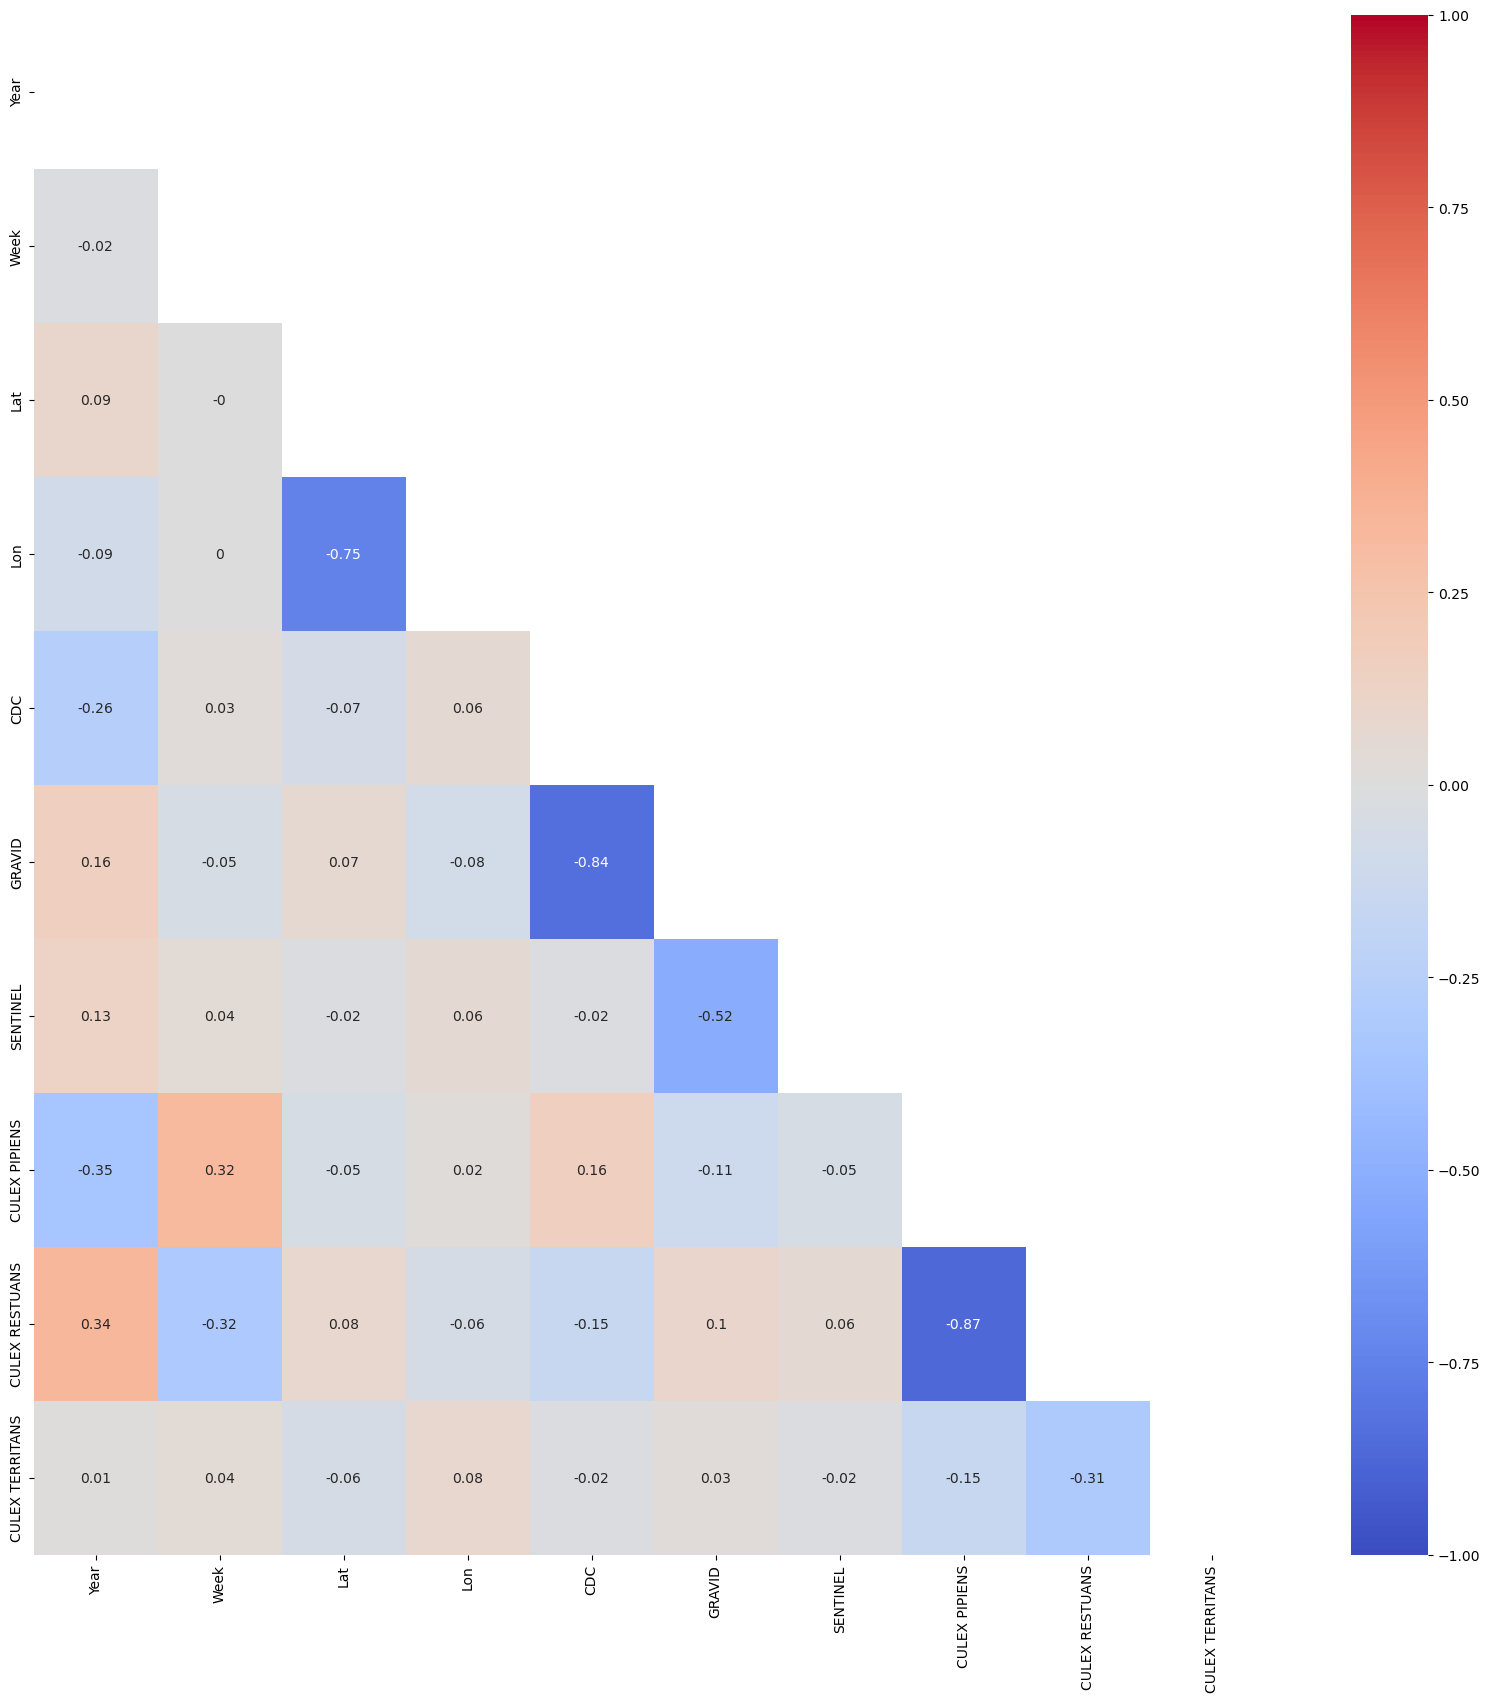

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

There are still have some columns have high value of correlation: 
1. `CULEX RESTUANS` AND `CULEX PIPIENS` 
2. `GRAVID` AND `CDC
3. `SENTINEL` AND `GRAVID`
We do not eliminate any column in those pair because it is ....... We are going to keep those table and keep in mind when we are build and fit the model.

We will checking with 2 other assumption : **Residuals are normally distributed** and **Homoscedasticity** after we fitting the model.

## 2. Model

### Model 1: Backward or Top-Down approach

In [45]:
# add constant
X_withconst= sm.add_constant(X)
X_withconst.head()

,const,Year,Week,Lat,Lon,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,39,41.977738,-87.880969,0,1,0,0,1,0
1,1.0,2019,39,41.798211,-87.736925,0,1,0,0,1,0
2,1.0,2019,39,41.987245,-87.689417,0,1,0,0,1,0
3,1.0,2019,39,41.953664,-87.724987,0,1,0,0,1,0
4,1.0,2019,39,41.657069,-87.546049,0,1,0,0,1,0


In [46]:
#Instantiate Linear model
my_linear= sm.OLS(y, X_withconst)

In [47]:
#fit model
my_linear= my_linear.fit()
#Looking at summary
my_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        16:30:50   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18484   BIC:                         1.470e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3036.4210    111.514    -27.229      0.000   -3255.000   -2817.842
Year                0.5399      0.028     19.075      0.000       0.484       0.595
Week               -0.1493      0.023     -6.425      0.000      -0.195      -0.104
Lat                -4.8611      1.239     -3.924      0.000      -7.289      -2.433
Lon               -24.5096      1.503    -16.309      0.000     -27.455     -21.564
CDC                20.9281     12.855      1.628      0.104      -4.268      46.125
GRAVID              9.9820     12.844      0.777      0.437     -15.194      35.158
SENTINEL           23.0240     12.878      1.788      0.074      -2.219      48.266
CULEX PIPIENS       9.7469      0.874     11.156      0.000       8.034      11.459
CULEX RESTUANS      8.4916      0.867      9.790      0.000       6.791      10.192
CULEX TERRITANS     0.4552      0.957      0.475      0.634      -1.421       2.332
==============================================================================
Omnibus:                     4535.839   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8989.340
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1 | 0.092 |
|-------------|-------|


Look at the summary above, our `R Squared` is very low but all the `P-value` is smaller than 0.05

## Model 2: Forward or Bottom-Up approach 

### Model 2.1 

Let look at the correlation betwent the dependet variable with other column

In [48]:
public_health_df.corr()['Mosquito number']

/var/folders/lv/tbn_js5s77ndnb22_v4_z6q80000gn/T/ipykernel_12544/1629636978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  public_health_df.corr()['Mosquito number']


Year               0.129326
Week              -0.033900
Mosquito number    1.000000
WNV Present        0.408034
Lat                0.096820
Lon               -0.151421
Month             -0.040426
CDC                0.094147
GRAVID            -0.138275
SENTINEL           0.108575
CULEX PIPIENS      0.014730
CULEX RESTUANS     0.070999
CULEX TERRITANS   -0.150962
Name: Mosquito number, dtype: float64

As we can see, the higest correlation is with `Lon`,`Year`,`CULEX TERRIANS`, let  try to build the model with one of this coulumn.

In [49]:
my_linear2= sm.OLS(y, X_withconst[['const', 'Year']])
#fit model
my_linear2= my_linear2.fit()
#get summary
my_linear2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     314.6
Date:                Sun, 07 May 2023   Prob (F-statistic):           8.39e-70
Time:                        16:30:54   Log-Likelihood:                -74189.
No. Observations:               18495   AIC:                         1.484e+05
Df Residuals:                   18493   BIC:                         1.484e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -930.6059     53.084    -17.531      0.000   -1034.655    -826.557
Year           0.4677      0.026     17.736      0.000       0.416       0.519
==============================================================================
Omnibus:                     5062.043   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10702.761
Skew:                           1.644   Prob(JB):                         0.00
Kurtosis:                       4.754   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We got a good Pvalue here but the R Square even smaller:
    
**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1 | 0.092 |
|-------------|-------|
|Model 2.1 | 0.01

Let add some more column in to build the difference model

### Model 2.2

In [50]:
my_linear3= sm.OLS(y, X_withconst[['const','Lon','Year','CULEX TERRITANS','SENTINEL', 'GRAVID']])

In [51]:
#fit the model
my_linear3=my_linear3.fit()
#get summary
my_linear3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     337.8
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        16:31:37   Log-Likelihood:                -73537.
No. Observations:               18495   AIC:                         1.471e+05
Df Residuals:                   18489   BIC:                         1.471e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2749.9307     98.932    -27.796      0.000   -2943.846   -2556.015
Lon               -19.9704      1.005    -19.869      0.000     -21.941     -18.000
Year                0.5068      0.027     18.975      0.000       0.454       0.559
CULEX TERRITANS    -8.4359      0.439    -19.233      0.000      -9.296      -7.576
SENTINEL            1.5869      1.084      1.464      0.143      -0.538       3.712
GRAVID            -10.9901      0.582    -18.889      0.000     -12.131      -9.850
==============================================================================
Omnibus:                     4591.308   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9166.223
Skew:                           1.518   Prob(JB):                         0.00
Kurtosis:                       4.636   Cond. No.                     2.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Same as 2 other model. We have the good P value but the R squared is very low for all of them: 
    
**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1 | 0.092 |
|-------------|-------|
|Model 2.1 | 0.017
|---------|-------|
|Model 2.2 | 0.83 |

## Model Diagnostics

We need to check last two of for assumptions with a linear regression model:
    
- Residuals are normally distributed
- Homoscedasticity: The vairance of residual is the same for any value of X

### Residuals

For the residual, we are going to use the histogram to see is this normally distributed of not.

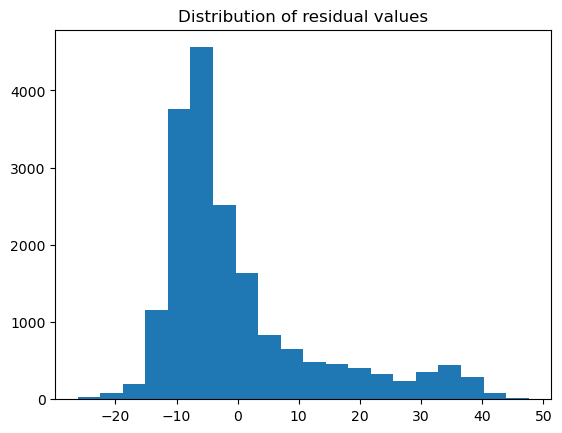

In [52]:
#plotting the residuals of model 1, which has higest R-squared
plt.figure()
plt.hist(my_linear.resid, bins =20)
plt.title('Distribution of residual values')
plt.show()

The histogram does not look really close to a normal distribution. So we are going to check with the Shaprio-Wilk test.

In [53]:
#calculating the shapiro test statistic  and P-value
print('Shapiro-Wilk test: ', stats.shapiro(my_linear.resid))

Shapiro-Wilk test:  ShapiroResult(statistic=0.8270089626312256, pvalue=0.0)


/Users/henryvuong/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The null hypothesis of the Shapiro -WIlk test is the data are normally distributed. As we can see from the test above, P-value =0, so we can reject the the data is normally distributed.

Let's try with Q-Q plot

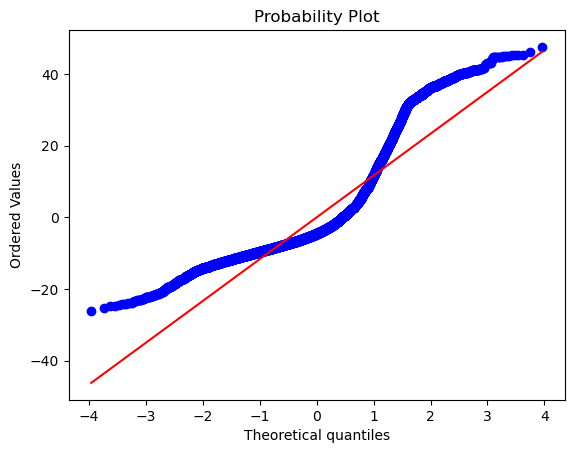

In [54]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linear.resid, dist= 'norm', plot= plt)
plt.show()

Most of the point here does not match the line. So it is not the normal distibuted 

### 4. Homoscedasticity

The variance of residual is the same.

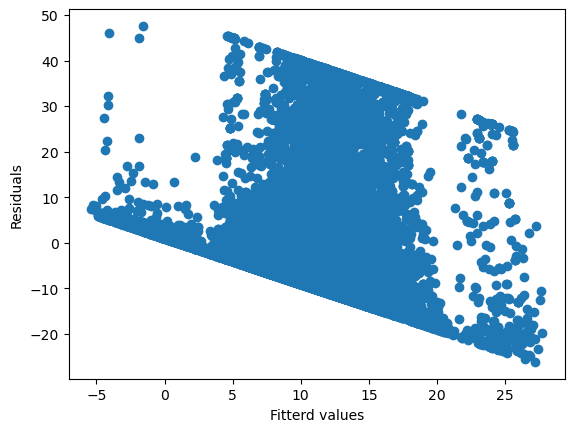

In [55]:
# plot the seiduals and the predicted values
plt.figure()
plt.scatter(my_linear.fittedvalues, my_linear.resid)
plt.xlabel('Fitterd values')
plt.ylabel('Residuals')
plt.show()


All of the model has $R^2$  very small and it does not apply with all the assumption. We propbly need more data for to be able to see if the model can be apply in the reallity

**Question 2:** Run a **logistic regression** to determine how the independent variables affect West Nile Virus presence

look again the dataset info

In [56]:
public_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Date             18495 non-null  object 
 5   Mosquito number  18495 non-null  int64  
 6   WNV Present      18495 non-null  int64  
 7   Lat              18495 non-null  float64
 8   Lon              18495 non-null  float64
 9   Month            18495 non-null  int64  
 10  CDC              18495 non-null  uint8  
 11  GRAVID           18495 non-null  uint8  
 12  SENTINEL         18495 non-null  uint8  
 13  CULEX PIPIENS    18495 non-null  uint8  
 14  CULEX RESTUANS   18495 non-null  uint8  
 15  CULEX TERRITANS  18495 non-null  uint8  
dtypes: float64(2), int64(5), object(3), uint8(6)
memory usage:

### Model

Identify target variable and independence variable for Logistic regression


For the independent variables, we are going to drop some non nummeric columns and also the `Month` column. The reason to drop the `Month` column is when we know the week, we can figure the month for that year.

In [57]:
X_logit= public_health_df.drop(columns=['Address Block', 'Trap', 'Date', 'WNV Present','Month'])
#X_logit= public_health_df[['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'Month']]


In [58]:
y_logit= public_health_df['WNV Present']

In [59]:
# check
display(X_logit)
print(y_logit)

,Year,Week,Mosquito number,Lat,Lon,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,0,1,0,0,1,0
1,2019,39,1,41.798211,-87.736925,0,1,0,0,1,0
2,2019,39,2,41.987245,-87.689417,0,1,0,0,1,0
3,2019,39,1,41.953664,-87.724987,0,1,0,0,1,0
4,2019,39,9,41.657069,-87.546049,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,4,41.857843,-87.635858,0,1,0,1,0,0
18491,2007,34,19,41.965376,-87.758403,0,1,0,1,0,0
18492,2016,30,34,41.662395,-87.590176,0,1,0,0,1,0
18493,2017,33,50,41.919197,-87.664758,0,0,1,0,1,0


0        0
1        0
2        0
3        0
4        0
        ..
18490    1
18491    1
18492    1
18493    1
18494    1
Name: WNV Present, Length: 18495, dtype: int64


In [60]:
#add constant
X_logit_withconst= sm.add_constant(X_logit)
X_logit_withconst

,const,Year,Week,Mosquito number,Lat,Lon,CDC,GRAVID,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,0,1,0,0,1,0
1,1.0,2019,39,1,41.798211,-87.736925,0,1,0,0,1,0
2,1.0,2019,39,2,41.987245,-87.689417,0,1,0,0,1,0
3,1.0,2019,39,1,41.953664,-87.724987,0,1,0,0,1,0
4,1.0,2019,39,9,41.657069,-87.546049,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,1.0,2016,36,4,41.857843,-87.635858,0,1,0,1,0,0
18491,1.0,2007,34,19,41.965376,-87.758403,0,1,0,1,0,0
18492,1.0,2016,30,34,41.662395,-87.590176,0,1,0,0,1,0
18493,1.0,2017,33,50,41.919197,-87.664758,0,0,1,0,1,0


In [61]:
#inititate  the logitic model
my_logit= sm.Logit(y_logit, X_logit_withconst)
#fit model
my_logit= my_logit.fit()
#get the summary
my_logit.summary()

         Current function value: 0.405718
         Iterations: 35


/Users/henryvuong/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18483
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2224
Time:                        16:35:18   Log-Likelihood:                -7503.8
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -525.2251   7074.975     -0.074      0.941   -1.44e+04    1.33e+04
Year                0.1092      0.007     16.147      0.000       0.096       0.122
Week                0.1482      0.006     26.212      0.000       0.137       0.159
Mosquito number     0.0650      0.001     44.685      0.000       0.062       0.068
Lat                -0.6587      0.286     -2.299      0.021      -1.220      -0.097
Lon                -3.5483      0.335    -10.603      0.000      -4.204      -2.892
CDC                13.8715   7074.931      0.002      0.998   -1.39e+04    1.39e+04
GRAVID             14.0018   7074.931      0.002      0.998   -1.39e+04    1.39e+04
SENTINEL           13.6144   7074.931      0.002      0.998   -1.39e+04    1.39e+04
CULEX PIPIENS       1.0015      0.322      3.112      0.002       0.371       1.632
CULEX RESTUANS      0.7518      0.321      2.340      0.019       0.122       1.381
CULEX TERRITANS    -1.4874      0.419     -3.548      0.000      -2.309      -0.666
===================================================================================
"""

As we can see above, there is most of the independent variable have P-value <0.05. There is 3 of them we cannot reject the null Hypothesis is `CDC`, `GRAVID`, `SENTINEL`. We will keep an eye on those columns in the further analysis when we develope the model.


### Evaluation

We are going to evaluate the accurancy of the logistic model.

In [62]:
y_predict= my_logit.predict(X_logit_withconst)

#print it out

y_predict

0        0.528282
1        0.414684
2        0.360612
3        0.380038
4        0.399184
           ...   
18490    0.255411
18491    0.266976
18492    0.427569
18493    0.733072
18494    0.278353
Length: 18495, dtype: float64

In [72]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
# We will set our threshold to 0.5 
y_predict2= np.where(y_predict>=0.5, 1, 0)

y_predict2

array([1, 0, 0, ..., 0, 1, 0])

Calculate the accurency

In [73]:
acc= (y_predict2==y_logit).mean()
print(f'Model accuracy={round(100*acc,2)}%')

Model accuracy=81.04%


So our model had a accurancy score is 81.04% which is quite good for this first model

For the first try of logistic model, we are set the threshold to decide the negative and positive of the `WNV present` is 0.5. Let take a look when we set the difference threshold for the mordel

In [77]:
accuracy_list= []
threshold_list= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in threshold_list:
    y_predict_test= np.where(y_predict>=threshold, 1, 0)
    #calculate accuracy
    acc= 100*(y_predict_test==y_logit).mean()
    #add the accuration to dictionary
    accuracy_list.append(acc)
accuracy_df_0= pd.DataFrame(index=range(len(threshold_list)),
                            data= zip(threshold_list, accuracy_list),
                            columns=['Threshold', 'Accuracy']
                           )
accuracy_df_0

,Threshold,Accuracy
0,0.1,56.301703
1,0.2,72.603406
2,0.3,78.642876
3,0.4,80.291971
4,0.5,81.043525
5,0.6,81.140849
6,0.7,80.443363
7,0.8,79.318735
8,0.9,78.399567


Plot the accuracy


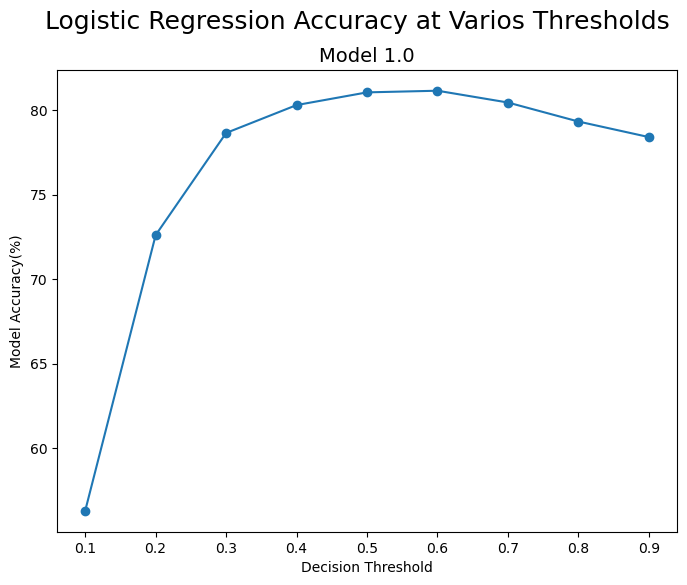

In [78]:
plt.figure(figsize=(8,6))
plt.plot(accuracy_df_0['Threshold'], accuracy_df_0['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Varios Thresholds', size= 18)
plt.title('Model 1.0', size=14)
plt.xlabel('Decision Threshold')
plt.ylabel('Model Accuracy(%)')
plt.yticks()
plt.show()

| Model | Accuracy | Decision Threshold | Accuracy | Decision Threshold |
|-------|----------|--------------------|----------|--------------------|
| 1.0   | 81.04%   | 0.5                | 81.14%   | 0.6                |

As we can see above, the model get the highest accuracy when we set the threshold is 0.6. But when we look at the P-value of the model, there are some variable make the P value is higher than 0.05. so we might need to do some more model have the best result.

But first we need to do interpreting coefficents firts

### Interpreting coefficents

The reason to do interpreting corfficents is clarify how the defferent factors  impact to the model.

In [79]:
#getting the regresson coefficients from the fitted model

my_logit.params

const             -525.225053
Year                 0.109209
Week                 0.148184
Mosquito number      0.065012
Lat                 -0.658661
Lon                 -3.548342
CDC                 13.871457
GRAVID              14.001798
SENTINEL            13.614382
CULEX PIPIENS        1.001470
CULEX RESTUANS       0.751754
CULEX TERRITANS     -1.487370
dtype: float64

In [88]:
#put it in dataframe

logit_df= pd.DataFrame(my_logit.params, columns=['Coefficients'])
logit_df

,Coefficients
const,-525.225053
Year,0.109209
Week,0.148184
Mosquito number,0.065012
Lat,-0.658661
Lon,-3.548342
CDC,13.871457
GRAVID,14.001798
SENTINEL,13.614382
CULEX PIPIENS,1.001470


In [89]:
# calculate the odd ratio for each independence variable
logit_df['odd_ratio']= np.exp(logit_df['Coefficients'])
logit_df

,Coefficients,odd_ratio
const,-525.225053,7.900554e-229
Year,0.109209,1.115395e+00
Week,0.148184,1.159727e+00
Mosquito number,0.065012,1.067172e+00
Lat,-0.658661,5.175441e-01
Lon,-3.548342,2.877230e-02
CDC,13.871457,1.057541e+06
GRAVID,14.001798,1.204768e+06
SENTINEL,13.614382,8.178071e+05
CULEX PIPIENS,1.001470,2.722280e+00


There are 3 factor it makes very big positive impact to the WNV presence is 3 type of trap. Which maybe relate to the P value when we run the model. Three type of trap have the P value is very high P value 0.998 for all of them.

#### Model 1.1

We start with remove 1 of the independent variable which had a p-value >0.05 for their regression coefficiient. 

In [90]:
my_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18483
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2224
Time:                        23:23:55   Log-Likelihood:                -7503.8
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -525.2251   7074.975     -0.074      0.941   -1.44e+04    1.33e+04
Year                0.1092      0.007     16.147      0.000       0.096       0.122
Week                0.1482      0.006     26.212      0.000       0.137       0.159
Mosquito number     0.0650      0.001     44.685      0.000       0.062       0.068
Lat                -0.6587      0.286     -2.299      0.021      -1.220      -0.097
Lon                -3.5483      0.335    -10.603      0.000      -4.204      -2.892
CDC                13.8715   7074.931      0.002      0.998   -1.39e+04    1.39e+04
GRAVID             14.0018   7074.931      0.002      0.998   -1.39e+04    1.39e+04
SENTINEL           13.6144   7074.931      0.002      0.998   -1.39e+04    1.39e+04
CULEX PIPIENS       1.0015      0.322      3.112      0.002       0.371       1.632
CULEX RESTUANS      0.7518      0.321      2.340      0.019       0.122       1.381
CULEX TERRITANS    -1.4874      0.419     -3.548      0.000      -2.309      -0.666
===================================================================================
"""

Let drop the `GRAVID` column as  an independent variable from `X_logit_withconst`

In [91]:
X_logit_withconst_1= X_logit_withconst.drop(columns=['GRAVID'], axis=1)

display(X_logit_withconst_1)

,const,Year,Week,Mosquito number,Lat,Lon,CDC,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,0,0,0,1,0
1,1.0,2019,39,1,41.798211,-87.736925,0,0,0,1,0
2,1.0,2019,39,2,41.987245,-87.689417,0,0,0,1,0
3,1.0,2019,39,1,41.953664,-87.724987,0,0,0,1,0
4,1.0,2019,39,9,41.657069,-87.546049,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18490,1.0,2016,36,4,41.857843,-87.635858,0,0,1,0,0
18491,1.0,2007,34,19,41.965376,-87.758403,0,0,1,0,0
18492,1.0,2016,30,34,41.662395,-87.590176,0,0,0,1,0
18493,1.0,2017,33,50,41.919197,-87.664758,0,1,0,1,0


In [92]:
#run model

my_logit_1= sm.Logit(y_logit, X_logit_withconst_1)

my_logit_1= my_logit_1.fit()

my_logit_1.summary()

Optimization terminated successfully.
         Current function value: 0.405719
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.2224
Time:                        23:28:37   Log-Likelihood:                -7503.8
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -511.2284     25.101    -20.367      0.000    -560.425    -462.032
Year                0.1092      0.007     16.148      0.000       0.096       0.122
Week                0.1482      0.006     26.214      0.000       0.137       0.159
Mosquito number     0.0650      0.001     44.686      0.000       0.062       0.068
Lat                -0.6586      0.286     -2.299      0.022      -1.220      -0.097
Lon                -3.5483      0.335    -10.603      0.000      -4.204      -2.892
CDC                -0.1303      0.131     -0.991      0.322      -0.388       0.127
SENTINEL           -0.3875      0.171     -2.268      0.023      -0.722      -0.053
CULEX PIPIENS       1.0014      0.322      3.112      0.002       0.371       1.632
CULEX RESTUANS      0.7517      0.321      2.340      0.019       0.122       1.381
CULEX TERRITANS    -1.4874      0.419     -3.548      0.000      -2.309      -0.666
===================================================================================
"""

The P value are under 0.05 except for `CDC`. Let's check the accuracy from this model

#### Evaluation

In [93]:
y_predict3= my_logit_1.predict(X_logit_withconst_1)

In [94]:
y_predict_test2= np.where(y_predict3 >=0.5, 1, 0)
#accuracy 
acc_1= (y_predict_test2==y_logit).mean()

print(f'Model Accuracy= {round(100*acc_1, 2)}%')

Model Accuracy= 81.04%


This model has the same accuracy with the previos model.
Let's take a look at how changing the threshold affects the accuracy of the model

In [100]:
accuracy_list= []
threshold_list= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_predict_test2= np.where(y_predict3 >= threshold, 1, 0)
    # accuracy
    acc_1= 100*(y_predict_test2==y_logit).mean()
    #add the accuracy to dictionary
    accuracy_list.append(acc_1)

accuracy_df_1= pd.DataFrame(index=range(len(threshold_list)),
                            data= zip(threshold_list, accuracy_list),
                            columns=['Threshold', 'Accuracy']
)
accuracy_df_1

,Threshold,Accuracy
0,0.1,56.301703
1,0.2,72.603406
2,0.3,78.642876
3,0.4,80.291971
4,0.5,81.043525
5,0.6,81.140849
6,0.7,80.443363
7,0.8,79.318735
8,0.9,78.399567


Let plot it

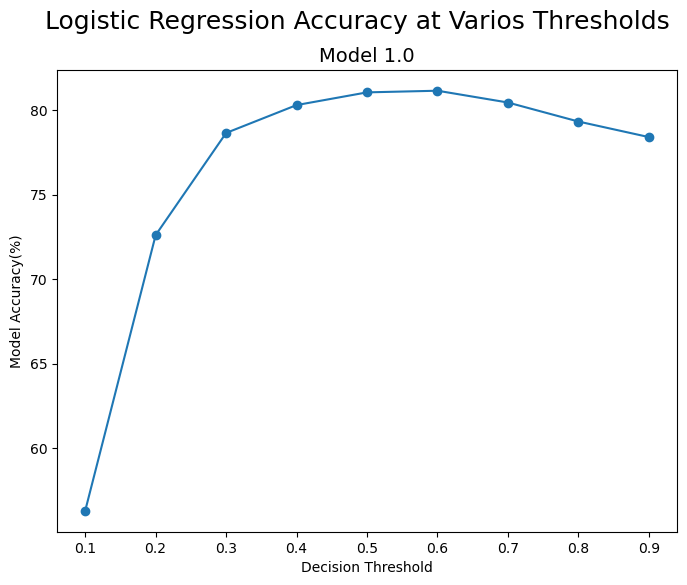

In [101]:
plt.figure(figsize=(8,6))
plt.plot(accuracy_df_1['Threshold'], accuracy_df_1['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Varios Thresholds', size= 18)
plt.title('Model 1.0', size=14)
plt.xlabel('Decision Threshold')
plt.ylabel('Model Accuracy(%)')
plt.yticks()
plt.show()

This is very similar with the previous model that the highest is threshold = 0.6 and accuracy for that is 81.14%
    
| Model | Accuracy | Decision Threshold | Accuracy | Decision Threshold |
|-------|----------|--------------------|----------|--------------------|
| 1.0   | 81.04%   | 0.5                | 81.14%   | 0.6                |
| 1.1   | 81.04%.  | 0.5                | 81.14%.  | 0.6                |

The P value for the **model 1.1** still has the variable with P value > 0.05 is `CDC`. Let's do some investment

#### Interpreting coefficents

In [102]:
#getting the regresson coefficients from the fitted model

my_logit_1.params

const             -511.228390
Year                 0.109214
Week                 0.148193
Mosquito number      0.065013
Lat                 -0.658633
Lon                 -3.548275
CDC                 -0.130306
SENTINEL            -0.387461
CULEX PIPIENS        1.001416
CULEX RESTUANS       0.751739
CULEX TERRITANS     -1.487392
dtype: float64

In [103]:
#put it in dataframe

logit_1_df= pd.DataFrame(my_logit_1.params, columns=['Coefficients'])
logit_1_df

,Coefficients
const,-511.228390
Year,0.109214
Week,0.148193
Mosquito number,0.065013
Lat,-0.658633
Lon,-3.548275
CDC,-0.130306
SENTINEL,-0.387461
CULEX PIPIENS,1.001416
CULEX RESTUANS,0.751739


In [104]:
# calculate the odd ratio for each independence variable
logit_1_df['odd_ratio']= np.exp(logit_1_df['Coefficients'])
logit_1_df

,Coefficients,odd_ratio
const,-511.228390,9.469589e-223
Year,0.109214,1.115401e+00
Week,0.148193,1.159737e+00
Mosquito number,0.065013,1.067173e+00
Lat,-0.658633,5.175584e-01
Lon,-3.548275,2.877422e-02
CDC,-0.130306,8.778268e-01
SENTINEL,-0.387461,6.787779e-01
CULEX PIPIENS,1.001416,2.722133e+00
CULEX RESTUANS,0.751739,2.120684e+00


#### Model 1.2

This time we will drop the `CDC` variable because its p-value is >0.05 in model 1.1

In [117]:
my_logit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 May 2023   Pseudo R-squ.:                  0.2224
Time:                        00:45:14   Log-Likelihood:                -7503.8
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -511.2284     25.101    -20.367      0.000    -560.425    -462.032
Year                0.1092      0.007     16.148      0.000       0.096       0.122
Week                0.1482      0.006     26.214      0.000       0.137       0.159
Mosquito number     0.0650      0.001     44.686      0.000       0.062       0.068
Lat                -0.6586      0.286     -2.299      0.022      -1.220      -0.097
Lon                -3.5483      0.335    -10.603      0.000      -4.204      -2.892
CDC                -0.1303      0.131     -0.991      0.322      -0.388       0.127
SENTINEL           -0.3875      0.171     -2.268      0.023      -0.722      -0.053
CULEX PIPIENS       1.0014      0.322      3.112      0.002       0.371       1.632
CULEX RESTUANS      0.7517      0.321      2.340      0.019       0.122       1.381
CULEX TERRITANS    -1.4874      0.419     -3.548      0.000      -2.309      -0.666
===================================================================================
"""

Let drop the `CDC` from the X in previous model

In [1]:
X_logit_withconst_2= X_logit_withconst.drop(columns=['CDC', 'GRAVID'], axis=1)

display(X_logit_withconst_2)

NameError: name 'X_logit_withconst' is not defined

In [108]:
#run model

my_logit_2= sm.Logit(y_logit, X_logit_withconst_2)

my_logit_2= my_logit_2.fit()

my_logit_2.summary()

Optimization terminated successfully.
         Current function value: 0.405719
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 May 2023   Pseudo R-squ.:                  0.2224
Time:                        00:35:40   Log-Likelihood:                -7503.8
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -511.3452     25.075    -20.392      0.000    -560.492    -462.198
Year                0.1092      0.007     16.147      0.000       0.096       0.122
Week                0.1482      0.006     26.214      0.000       0.137       0.159
Mosquito number     0.0650      0.001     44.687      0.000       0.062       0.068
Lat                -0.6587      0.286     -2.299      0.021      -1.220      -0.097
Lon                -3.5483      0.335    -10.603      0.000      -4.204      -2.892
GRAVID              0.1307      0.131      0.994      0.320      -0.127       0.388
SENTINEL           -0.2568      0.214     -1.197      0.231      -0.677       0.164
CULEX PIPIENS       1.0014      0.322      3.112      0.002       0.371       1.632
CULEX RESTUANS      0.7517      0.321      2.340      0.019       0.122       1.381
CULEX TERRITANS    -1.4874      0.419     -3.548      0.000      -2.309      -0.666
===================================================================================
"""

#### Evaluation

In [109]:
y_predict4= my_logit_2.predict(X_logit_withconst_2)

In [111]:
y_predict_test3= np.where(y_predict4 >=0.5, 1, 0)
#accuracy 
acc_1= (y_predict_test3==y_logit).mean()

print(f'Model Accuracy= {round(100*acc_1, 2)}%')

Model Accuracy= 81.04%


This model has the same accuracy with 2 others model. So seem like all the column we drop does not effects to the accuracy of the model.

Let see how the threshold will affect it

In [114]:
accuracy_list= []
threshold_list= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_predict_test3= np.where(y_predict4 >= threshold, 1, 0)
    # accuracy
    acc_1= 100*(y_predict_test3==y_logit).mean()
    #add the accuracy to dictionary
    accuracy_list.append(acc_1)

accuracy_df_2= pd.DataFrame(index=range(len(threshold_list)),
                            data= zip(threshold_list, accuracy_list),
                            columns=['Threshold', 'Accuracy']
)
accuracy_df_2

,Threshold,Accuracy
0,0.1,56.301703
1,0.2,72.603406
2,0.3,78.642876
3,0.4,80.291971
4,0.5,81.043525
5,0.6,81.140849
6,0.7,80.443363
7,0.8,79.318735
8,0.9,78.399567


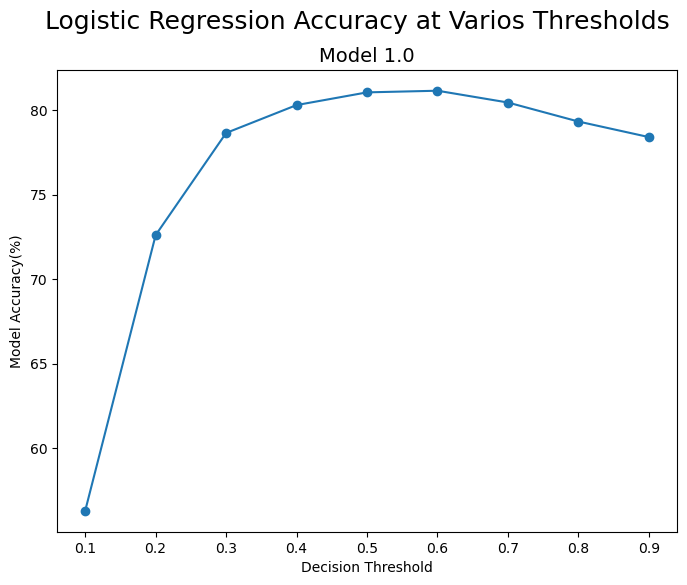

In [115]:
#plot it
plt.figure(figsize=(8,6))
plt.plot(accuracy_df_2['Threshold'], accuracy_df_2['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Varios Thresholds', size= 18)
plt.title('Model 1.0', size=14)
plt.xlabel('Decision Threshold')
plt.ylabel('Model Accuracy(%)')
plt.yticks()
plt.show()

This is very similar with 2 others previous model that the highest is threshold = 0.6 and accuracy for that is 81.14%
    
| Model | Accuracy | Decision Threshold | Accuracy | Decision Threshold |
|-------|----------|--------------------|----------|--------------------|
| 1.0   | 81.04%   | 0.5                | 81.14%   | 0.6                |
| 1.1   | 81.04%.  | 0.5                | 81.14%.  | 0.6                |
| 1.2   | 81.04%.  | 0.5                | 81.14%.  | 0.6                |

#### Interpreting coefficents

In [118]:
#getting the regresson coefficients from the fitted model

my_logit_2.params

const             -511.345184
Year                 0.109209
Week                 0.148192
Mosquito number      0.065014
Lat                 -0.658675
Lon                 -3.548256
GRAVID               0.130668
SENTINEL            -0.256793
CULEX PIPIENS        1.001414
CULEX RESTUANS       0.751723
CULEX TERRITANS     -1.487402
dtype: float64

In [119]:
#put it in dataframe

logit_2_df= pd.DataFrame(my_logit_2.params, columns=['Coefficients'])
logit_2_df

,Coefficients
const,-511.345184
Year,0.109209
Week,0.148192
Mosquito number,0.065014
Lat,-0.658675
Lon,-3.548256
GRAVID,0.130668
SENTINEL,-0.256793
CULEX PIPIENS,1.001414
CULEX RESTUANS,0.751723


In [120]:
# calculate the odd ratio for each independence variable
logit_2_df['odd_ratio']= np.exp(logit_2_df['Coefficients'])
logit_2_df

,Coefficients,odd_ratio
const,-511.345184,8.425747e-223
Year,0.109209,1.115395e+00
Week,0.148192,1.159736e+00
Mosquito number,0.065014,1.067174e+00
Lat,-0.658675,5.175364e-01
Lon,-3.548256,2.877479e-02
GRAVID,0.130668,1.139589e+00
SENTINEL,-0.256793,7.735284e-01
CULEX PIPIENS,1.001414,2.722127e+00
CULEX RESTUANS,0.751723,2.120651e+00


All three model have the accuracy is 81.04%. It seem very possible to apply this model